- https://albertauyeung.github.io/2017/04/23/python-matrix-factorization.html

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import boxcox, inv_boxcox
from scipy import stats

from recommenderSystem import RecSys
from recommenderSystemFastai import RecSysFastai

# Datios Intelia

In [2]:
!ls data

customers.csv  products.csv  relation.csv


In [3]:
dataPath = "data/"

users = pd.read_csv(dataPath + "customers.csv")
items = pd.read_csv(dataPath + "products.csv")
pairs = pd.read_csv(dataPath + "relation.csv")

/tmp/ipykernel_928/3077265193.py:3: DtypeWarning: Columns (7,9,10,11,12,13,17,18,21,26,27,28,30,36) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv(dataPath + "customers.csv")
/tmp/ipykernel_928/3077265193.py:4: DtypeWarning: Columns (20,32,34,39) have mixed types. Specify dtype option on import or set low_memory=False.
  items = pd.read_csv(dataPath + "products.csv")


# Compañía 15

In [4]:
pairs = pairs[ pairs.company_id == 15].copy()
users = users[ users.company_id == 15].copy()
items = items[ items.company_id == 15].copy()

## Train with fast.ai

In [5]:
rs = RecSysFastai(pairs)

<AxesSubplot:ylabel='Frequency'>

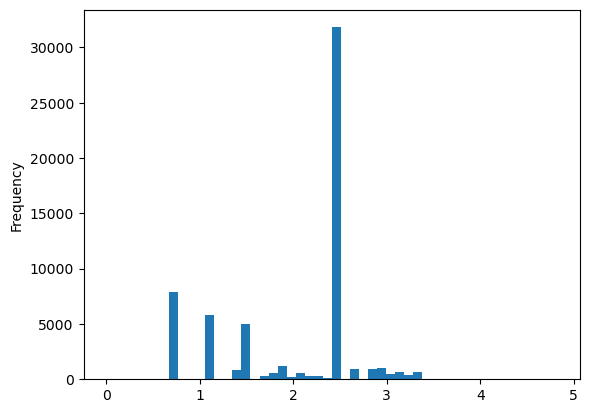

In [6]:
rs.df.peso.plot.hist(bins=50)

In [7]:
rs.entrenar_modelo(valid_pct=0.2)

epoch,train_loss,valid_loss,mae,time
0,0.460182,0.429582,0.453243,00:03
1,0.327104,0.358768,0.407756,00:02
2,0.201685,0.358649,0.419315,00:02
3,0.107382,0.349760,0.399568,00:02
4,0.058434,0.351109,0.403490,00:02


In [7]:
rs.entrenar_modelo(valid_pct=0)

epoch,train_loss,valid_loss,mae,time
0,0.421812,None,None,00:03
1,0.306182,None,None,00:03
2,0.200098,None,None,00:03
3,0.118793,None,None,00:03
4,0.067076,None,None,00:03


/home/javi/.local/lib/python3.10/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/home/javi/.local/lib/python3.10/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/home/javi/.local/lib/python3.10/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/home/javi/.local/lib/python3.10/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/home/javi/.local/lib/python3.10/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


In [9]:
rs.users[:10]

(#10) ['#na#',21724,21726,21728,21730,21731,21732,21733,21734,21735]

In [10]:
rs.items[:10]

(#10) ['#na#',28863,28864,28865,28866,28867,28868,28869,28870,28872]

Devuelve las sugerencias (ids de producto) para un usario concreto.

In [17]:
rs.sugerirProdutos(user_ids=[21726], limit=0.5)

(#16) [29113,29099,126488,28866,28863,28909,29315,29100,29136,28876...]

In [12]:
rs.sugerirProdutos(user_ids=[21726], limit=0.25)

(#6) [29114,'#na#',58675,28971,28987,28972]

---
Devuelve las sugerencias (ids de producto) para ciertos usarios filtrados.

In [18]:
rs.sugerirProdutos(user_ids=[21726,21728], limit=0.5)

(#11) [28909,126488,116851,29113,28970,126436,28876,29136,28863,36419...]

In [14]:
rs.sugerirProdutos(user_ids=[21726,21728], limit=0.3)

(#7) [116851,126488,116846,70253,29007,29136,52001]

---
Devuelve la audiencia (ids de usuarios) para un producto concreto.

In [22]:
rs.adienciaUsuaros(item_ids=[28863], limit=0.88)

(#3) [100175,153135,170430]

---
Devuelve la audiencia (ids de usuarios) para ciertos productos filtrados.

In [23]:
rs.adienciaUsuaros(item_ids=[28863,28864,28865], limit=0.2)

(#6) [24691,537941,31505,537346,533184,536691]

---
Devuelve los ids de producto que normalmente se compran junto a este producto.

In [15]:
rs.productos_parecidos(item_ids=[28863], limit=0.3)

(#56) [28863,29113,28909,29001,29315,126488,29317,70253,28987,28878...]

## Train with my module

In [9]:
split_idx = int(len(rs.samples) * 0.8)
#np.random.shuffle(self.samples)
train_samples = rs.samples[:split_idx]
valid_samples = rs.samples[split_idx:]

train_log = rs.entrenar_modelo_manualmente(
    train_samples = train_samples,
    valid_samples = valid_samples,
    embSize = 50,
    lr = 0.01,
    wd = 0.1,
    epochs=50)

Epoch: 1 ; trMAE = 0.2764 trMSE = 0.2481 valMAE = 0.5080 valMSE = 0.5370
Epoch: 2 ; trMAE = 0.2767 trMSE = 0.2325 valMAE = 0.5001 valMSE = 0.5209
Epoch: 3 ; trMAE = 0.2751 trMSE = 0.2237 valMAE = 0.4942 valMSE = 0.5103
Epoch: 4 ; trMAE = 0.2727 trMSE = 0.2172 valMAE = 0.4900 valMSE = 0.5022
Epoch: 5 ; trMAE = 0.2717 trMSE = 0.2125 valMAE = 0.4883 valMSE = 0.4994
Epoch: 6 ; trMAE = 0.2709 trMSE = 0.2085 valMAE = 0.4872 valMSE = 0.4957
Epoch: 7 ; trMAE = 0.2710 trMSE = 0.2053 valMAE = 0.4842 valMSE = 0.4903
Epoch: 8 ; trMAE = 0.2711 trMSE = 0.2028 valMAE = 0.4839 valMSE = 0.4887
Epoch: 9 ; trMAE = 0.2705 trMSE = 0.2004 valMAE = 0.4855 valMSE = 0.4904
Epoch: 10 ; trMAE = 0.2732 trMSE = 0.1988 valMAE = 0.4837 valMSE = 0.4862
Epoch: 11 ; trMAE = 0.2684 trMSE = 0.1965 valMAE = 0.4841 valMSE = 0.4877
Epoch: 12 ; trMAE = 0.2695 trMSE = 0.1950 valMAE = 0.4824 valMSE = 0.4846
Epoch: 13 ; trMAE = 0.2702 trMSE = 0.1935 valMAE = 0.4833 valMSE = 0.4855
Epoch: 14 ; trMAE = 0.2678 trMSE = 0.1923 valMA

KeyboardInterrupt: 

In [10]:
#rs.plot_training(train_log)